Feature Engineering - Part 1
--

Feature Engineering adalah tentang membuat fitur baru dari fitur yang sudah ada.

Dari sini kita akan membuat beberapa fitur baru yang bertujuan menaikkan akurasi dari model machine learning kita.

Fitur pertama yang kita buat adalah Family_Size, sesuai namanya ini adalah gabungan dari Parent, Children, Sibling, dan Spouse. Lalu kita tambahkan 1 dengan asumsi menghitung diri orang itu juga.

Untuk melihat nilai distinct dari Family_Size, anda dapat menjalankan perintah:

Fitur kedua yang kita buat adalah menggabungkan Family_Size dengan groupnya masing-masing tergantung jumlahnya.

Kategorinya adalah seperti berikut.

- Family Size 1 = Alone
- Family Size 2, 3 dan 4 = Small
- Family Size 5 dan 6 = Medium
- Family Size 7, 8 dan 11 = Large

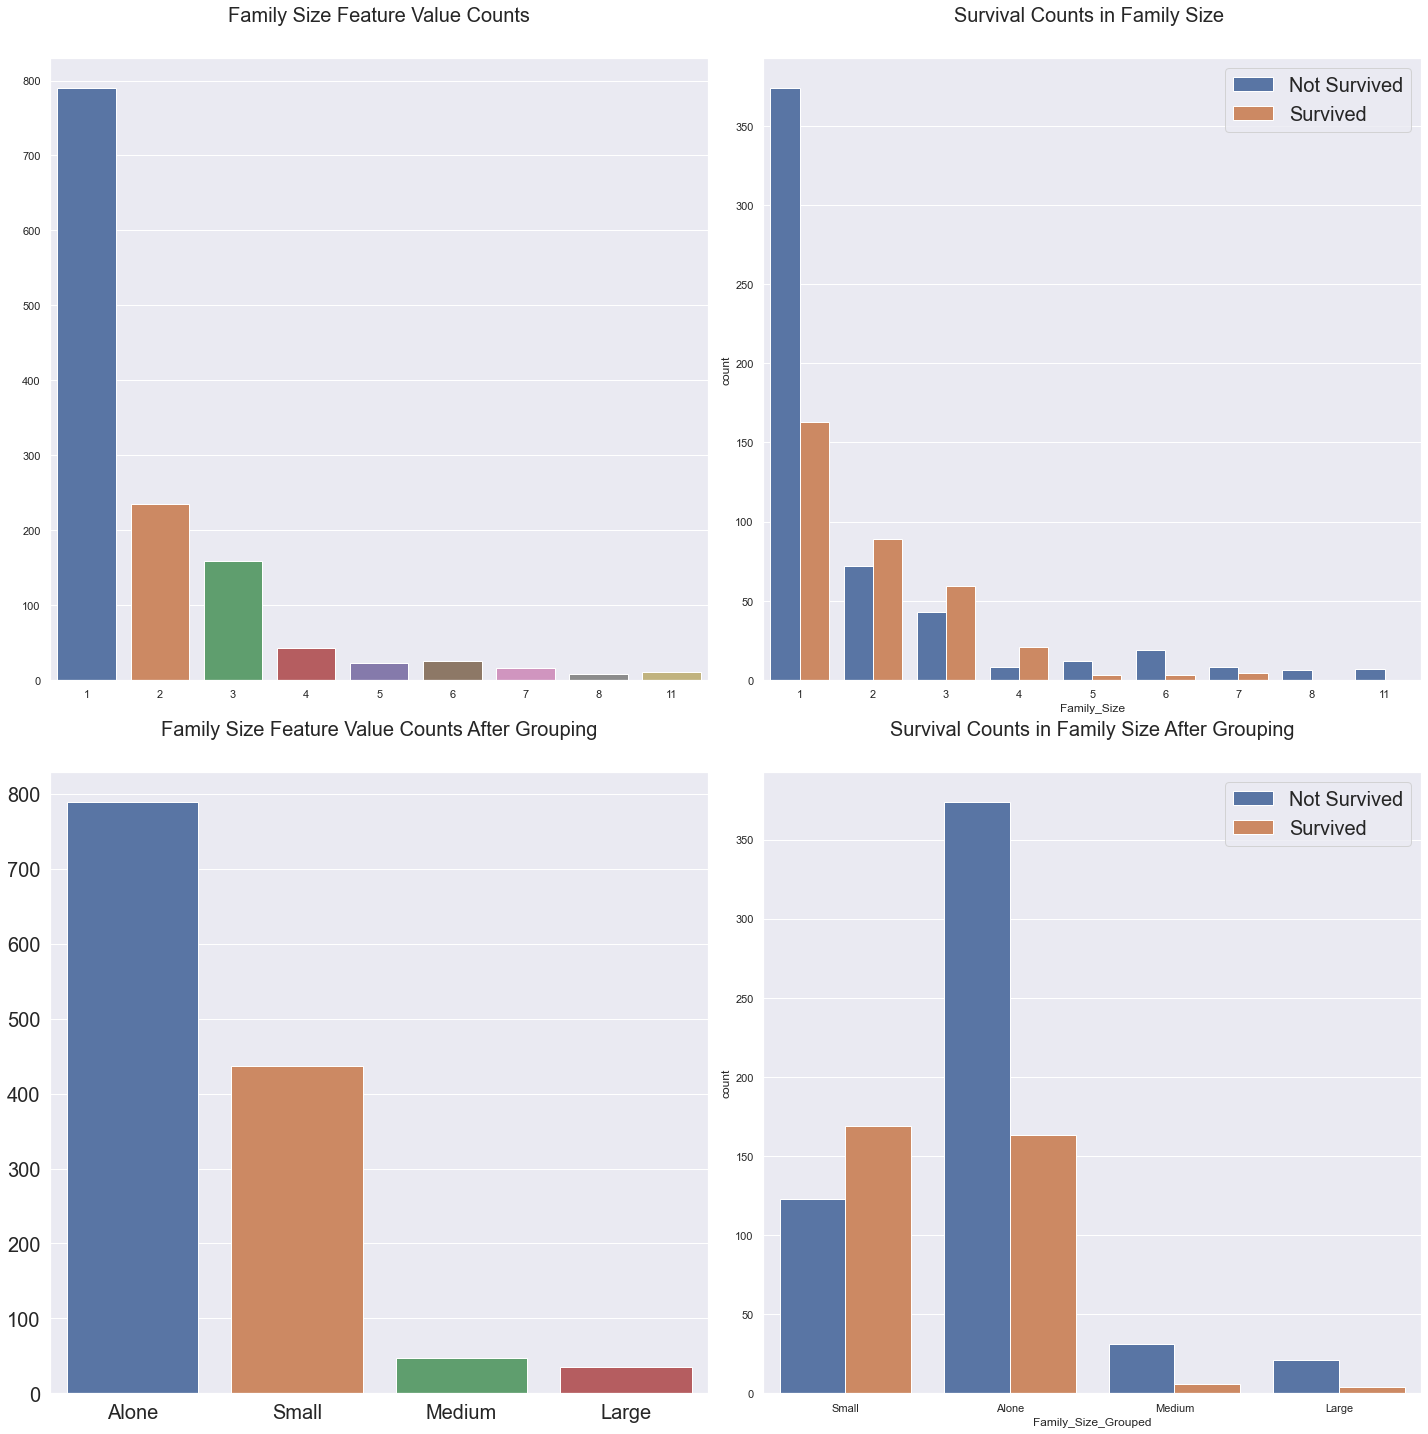

<Figure size 432x288 with 0 Axes>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

df_train = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_train.csv')
df_test = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_test.csv')
df_all = concat_df(df_train, df_test)
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'
dfs = [df_train, df_test]

age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
df_all['Embarked'] = df_all['Embarked'].fillna('S')
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
df_all['Fare'] = df_all['Fare'].fillna(med_fare)
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
for j in range(2):
    axs[i][j].tick_params(axis='x', labelsize=20)
    axs[i][j].tick_params(axis='y', labelsize=20)
    axs[i][j].set_xlabel('')
    axs[i][j].set_ylabel('')
    plt.tight_layout()
    plt.show()

Feature Engineering - Part 2
--

Kita buat feature baru bernama Ticket_Frequency dengan nilai gabungan dari Ticket yang sama. Contoh sebelumnya akan bernilai 6, karena ada 6 ticket yang sama dalam data kita.

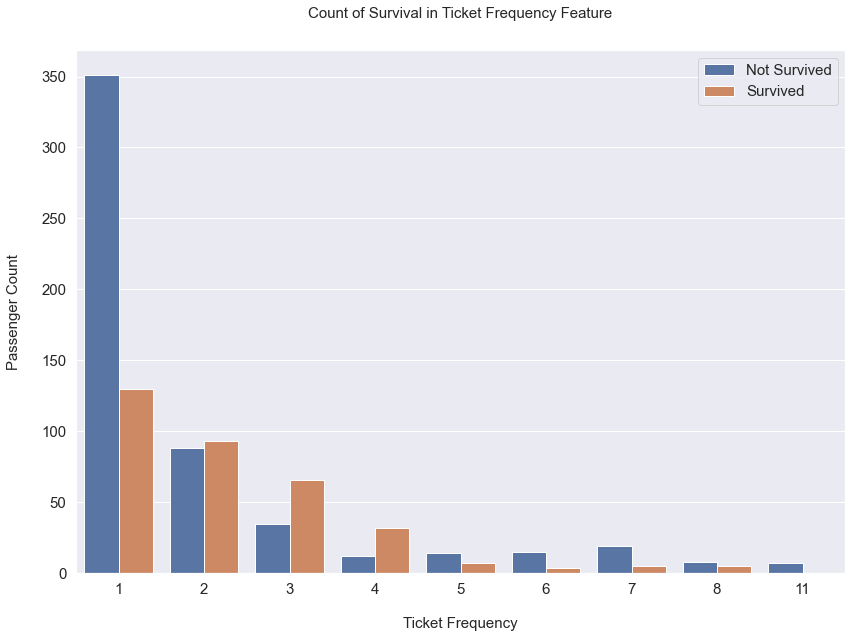

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

df_train = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_train.csv')
df_test = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_test.csv')
df_all = concat_df(df_train, df_test)
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'
dfs = [df_train, df_test]

age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
df_all['Embarked'] = df_all['Embarked'].fillna('S')
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
df_all['Fare'] = df_all['Fare'].fillna(med_fare)
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)
plt.tight_layout()
plt.show()

Pada hasil plot penjelasannya feature Family_Size_Grouped, di angka 2,3,4 kemungkinan tingkat selamatnya meningkat.

Kenapa feature ini berbeda dari Family_Size_Grouped? Karena bisa jadi ada pembantu, teman yang menggunakan tiket yang sama tetapi tidak terhitung sebagai keluarga.